<a href="https://colab.research.google.com/github/7Blessings7/Final-Project-CMS204/blob/main/Pair_14_Code_Nemenzo_Christian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the locations:
Location (enter 'done' to finish): A
Location (enter 'done' to finish): B
Location (enter 'done' to finish): C
Location (enter 'done' to finish): D
Location (enter 'done' to finish): E
Location (enter 'done' to finish): F
Location (enter 'done' to finish): done

Enter the distances between locations:
Enter 'start end weight' or 'done' to finish: A B 5
Enter 'start end weight' or 'done' to finish: A C 3
Enter 'start end weight' or 'done' to finish: A F 10
Enter 'start end weight' or 'done' to finish: B C 2
Enter 'start end weight' or 'done' to finish: B D 1
Enter 'start end weight' or 'done' to finish: C D 2
Enter 'start end weight' or 'done' to finish: C E 4
Enter 'start end weight' or 'done' to finish: D E 1
Enter 'start end weight' or 'done' to finish: D F 6
Enter 'start end weight' or 'done' to finish: E F 2
Enter 'start end weight' or 'done' to finish: done

Enter the starting location: A
Enter the ending location: F

The shortest distance between 'A' and 'F' i

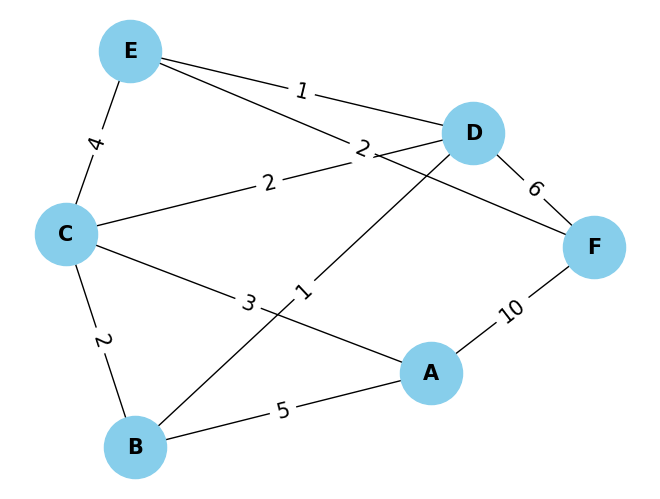

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self):
        # Initialize an empty adjacency list for the graph
        self.nodes = {}

    def add_node(self, name):
        # Add a node to the graph if it doesn't already exist
        if name not in self.nodes:
            self.nodes[name] = {}

    def add_edge(self, start, end, weight):
        # Add an edge between two nodes with the specified weight (distance)
        self.nodes[start][end] = weight
        self.nodes[end][start] = weight

    def dijkstra(self, start, end):
        # Implement Dijkstra's algorithm to find the shortest path between nodes
        heap = [(0, start)]  # Initialize a heap with the starting node and cost 0
        visited = set()  # Keep track of visited nodes
        while heap:
            (cost, current) = heapq.heappop(heap)
            if current in visited:
                continue
            visited.add(current)
            if current == end:
                return cost
            for neighbor, weight in self.nodes[current].items():
                if neighbor not in visited:
                    heapq.heappush(heap, (cost + weight, neighbor))

def visualize_graph(graph):
    # Convert the graph to a networkx graph and visualize it
    nx_graph = nx.Graph()

    # Add nodes from the graph to the networkx graph
    for node in graph.nodes:
        nx_graph.add_node(node)

    # Add edges from the graph to the networkx graph
    for start, edges in graph.nodes.items():
        for end, weight in edges.items():
            nx_graph.add_edge(start, end, weight=weight)

    # Create a layout and draw the networkx graph
    pos = nx.spring_layout(nx_graph)
    nx.draw(nx_graph, pos, with_labels=True, font_weight='bold', node_size=2000, node_color='skyblue', font_size=15)

    # Draw edge labels with weights (distances)
    edge_labels = nx.get_edge_attributes(nx_graph, 'weight')
    nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=edge_labels, font_size=15)

    # Display the visualization
    plt.show()

def main():
    graph = Graph()

    # Collect user inputs for locations (nodes)
    print("Enter the locations:")
    while True:
        location = input("Location (enter 'done' to finish): ")
        if location == 'done':
            break
        graph.add_node(location)

    # Collect user inputs for distances between locations (edges)
    print("\nEnter the distances between locations:")
    while True:
        edge_input = input("Enter 'start end weight' or 'done' to finish: ")
        if edge_input == 'done':
            break
        start, end, weight = edge_input.split()
        graph.add_edge(start, end, int(weight))

    # Collect user inputs for starting and ending locations for the shortest path
    start_location = input("\nEnter the starting location: ")
    end_location = input("Enter the ending location: ")

    # Calculate the shortest distance using Dijkstra's algorithm
    shortest_distance = graph.dijkstra(start_location, end_location)
    print(f"\nThe shortest distance between '{start_location}' and '{end_location}' is: {shortest_distance}")

    # Visualize the graph
    visualize_graph(graph)

if __name__ == "__main__":
    main()